#HW8 - Cyclic Voltammetry

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

The following is a simulation of cyclic voltammetry. It solves Fick's second law using numerical integration in both space and time. Fick's second law states

\begin{equation}\Large
\frac{\partial C(x, t)}{\partial t} = D \frac{\partial^2 C(x, t)}{\partial x^2}
\end{equation}

To integrate this numerically, we need expressions for the first and second derivatives that relate points in space and time starting with knowledge of the initial concentrations and concentration gradients.

If we define a series of $(x_i, y_i, z_i)$ values for different times ($x_0$ is the first x position, $y_0$ is the first y position, $z_0$ is the first z position), then we can establish the first two sets of $x, y, z$ points so $(x_0, y_0, z_0)$ will be the first position and $(x_1, y_1, z_1)$ will be the second position. The distance between $(x_0, y_0, z_0)$ and $(x_1, y_1, z_1)$ will be related to the velocity of the particle and its direction. The third position and all others after it can then be determined by using a numerical approximation for the derivative. If

\begin{equation}\Large
\left(\frac{d C}{d t}\right)_i = \frac{C_{i+1}-C_i}{\delta t}
\end{equation}

<center>and</center>

\begin{equation}\Large
\left(\frac{d C}{d x}\right)_i = \frac{C_{i+1}-C_i}{\delta x}
\end{equation}

<center>then</center>

\begin{equation}\Large
\left(\frac{d^2 C}{d x^2}\right)_i = \frac{\frac{d C_i}{dx}-\frac{d C_{i-1}}{dx}}{\delta x} = \frac{C_{i+1} - 2C_i + C_{i-1}}{\delta x^2}
\end{equation}

Notice that the second derivative is the derivative of the first derivative. The second derivative does have a small error associated with it. A more correct approach would use the Crank-Nicolson method. Substituting these expressions into Fick's second law will allow you to relate the values of the first three points. Since you know the first two $(x, y, z)$ points (you choose those values by picking the initial position and velocity), you can find the third point. Once you know the third point, you can find the fourth point etc. That allows you to find all the points.

A word of caution: the time increment, $\delta t$ can't be too large or the procedure will have errors that will accumulate and cause large discrepancies. You can check to see if the increment is too large by choosing a smaller one and seeing if the points change appreciably.

[None, None, None, None, None, None, None, None, None, None]

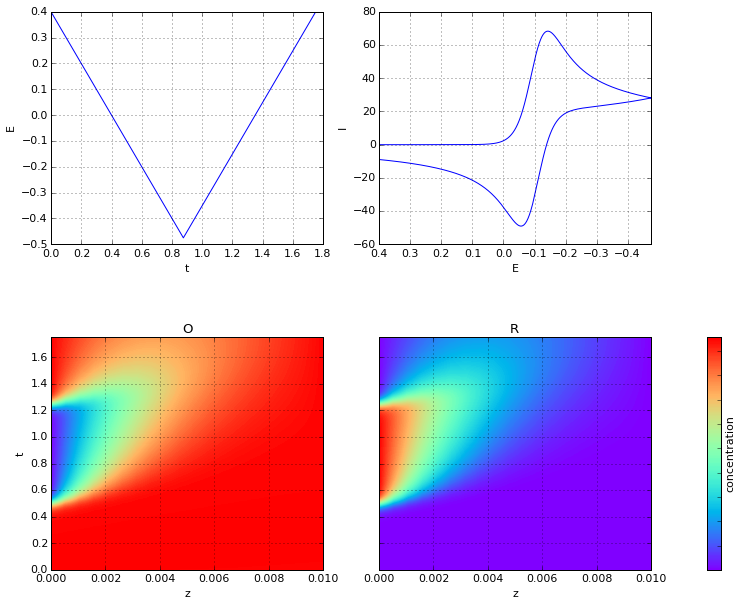

In [2]:
# simulation variables
t = np.linspace(0, 1.75, 3.5e3)
z = np.linspace(0, 0.01, 20)
dt = t[1]-t[0]
dz = z[1]-z[0]

# E(t)
Ei = 0.4  # initial 
v = 1. # rate
E = np.zeros(len(t))
turnaround_index = len(t)/2
E[:turnaround_index] = Ei-v*t[:turnaround_index]  # decending region
E[turnaround_index:] = Ei-v*0.5*t.max()+v*t[:turnaround_index]  # ascending region

F = 96500.
R = 8.314
T = 300.
a = F/(R*T)
n = 1.
E0 = -0.1

# R and O arrays
CR = 1e-5  # initial R concentration
CO = 0.1  # initial O concentration
DR = 1e-5  # R diffusion coefficient 
DO = DR  # O diffusion coefficient
# R and O are concentration arrays in (space, time)
R = np.zeros([len(z), len(t)])
O = np.zeros([len(z), len(t)])
# set concentration in all space for zero time
R[:, 0] = CR
O[:, 0] = CO
# set concentration for all time at furthest distance from electrode
R[-1, :] = CR
O[-1, :] = CO
for j in range(1, len(t)):
    R[0, j] = (1./(1+np.exp(n*a*(E[j]-E0))))*(O[0, j-1]+R[0, j-1])
    O[0, j] = ((np.exp(n*a*(E[j]-E0)))/(1+np.exp(n*a*(E[j]-E0))))*(O[0, j-1]+R[0, j-1])
    for i in range(1, len(z)-1):
        R[i, j] = R[i, j-1]+(dt*DR*(R[i+1, j-1]-2*R[i, j-1]+R[i-1, j-1]))/(dz**2)
        O[i, j] = O[i, j-1]+(dt*DO*(O[i+1, j-1]-2*O[i, j-1]+O[i-1, j-1]))/(dz**2)

# prepare to plot
fig = plt.figure(figsize=[12, 10])
gs = matplotlib.gridspec.GridSpec(2, 3, width_ratios=[20, 20, 1], wspace=0.3, hspace=0.4)

# potential
plt.subplot(gs[0])
plt.plot(t, E)
plt.xlabel('t')
plt.ylabel('E')
plt.grid()

# current
plt.subplot(gs[1])
area = 1.
I = n*F*area*DO*(O[1]-O[0])/dz
plt.plot(E, I)
plt.xlim(E.max(), E.min())
plt.xlabel('E')
plt.ylabel('I')
plt.grid()

# O
axO = plt.subplot(gs[3])
cax = axO.contourf(z, t, O.T, 200, cmap='rainbow')
axO.set_title('O')
axO.set_xlabel('z')
axO.set_ylabel('t')
axO.grid()

# R
axR = plt.subplot(gs[4])
cax = axR.contourf(z, t, R.T, 200, cmap='rainbow')
axR.set_title('R')
axR.set_xlabel('z')
plt.setp(axR.get_yticklabels(), visible=False)
axR.grid()

# colorbar
axc = plt.subplot(gs[5])
plt.colorbar(cax, cax=axc, label='concentration')
plt.setp(axc.get_yticklabels(), visible=False)

## 1
You first need to understand the simulation. Briefly explain the logic guiding each step and how it applies to the numerical integration of Fick's second law, the current, and the concentrations of the oxidized and reduced species. Justify the equations that are used in the program.

## 2
What do $i$ and $j$ represent in the program? What information is contained in the contour plots and how does that information relate to the concepts discussed in class?

## 3
Compare the voltammograms for different numbers of electrons in the half reactions. The separation between the reductive and oxidative peaks is expected to be 0.0591/n. Find whether your simulations reproduce this expectation. Any difference could be attributed to the error introduced by not using the Crank-Nicolson method.

## 4
Compare the voltammograms obtained for different scan rates. Describe how they differ and provide an explanation for the differences.

## 5
Graph the concentration gradients for the points indicated in the graph shown below. Do the gradients match what you expected from the discussion in lecture? Several of the points occur at the same voltage. Describe what causes the differences in currents.

<img src="CV_points.png" width="400">

## 6
Convert the simulation so it now simulates a single direction voltage scan from +0.4 V to -0.45 V. The simulation assumes the oxidized form of the molecule is dominant. Graph the voltammogram when the oxidized and reduced forms of the molecule are both present in equal amounts.

## 7
Now convert the simulation so it simulates a pulse voltammogram where the potential is 0.4 V and it is suddenly switched to -0.2 V for a given time (determined by you) and then returned to 0.4 V. Use the same concentrations of oxidized and reduced forms as you started with.